In [1]:
from qiskit import *
from qiskit.visualization import *
from qiskit.providers.aer import QasmSimulator
from qiskit.providers.ibmq import *
from qiskit.tools.monitor import job_monitor
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q')
sz=(3,3)

Given a function $f(x)=s.x~(mod~2)$ which takes a string of bits to either 0 or 1, find s. The mathematical explanation of the circuit is given below.
$$|0\rangle \rightarrow^{H^{\otimes n}}\frac{1}{\sqrt{2^n}}\sum_{x \in \{ 0,1 \}^n}^{}{(-1)^{0.x}|x\rangle}=\frac{1}{\sqrt{2^n}} \sum_{x \in \{ 0,1 \}^n}^{}{|x\rangle}$$ $$\rightarrow^{f_s} \frac{1}{\sqrt{2^n}} \sum_{x \in \{ 0,1 \}^n}^{}{(-1)^{f_s(x).x}|x\rangle}= \frac{1}{\sqrt{2^n}}\sum_{x \in \{ 0,1 \}^n}^{}{(-1)^{s.x}|x\rangle}\rightarrow^{H^{\otimes n}} |s\rangle$$

In [2]:
def circuitBV(s):
    s = s[::-1]
    n = len(s)
    qc = QuantumCircuit(QuantumRegister(n),QuantumRegister(1),ClassicalRegister(n))
    for i in range(n):
        qc.h(i)
    qc.h(n)
    qc.z(n)
    qc.barrier()
    for i in range(n):
        if s[i]=='1':
            qc.cx(i,n)
    qc.barrier()
    for i in range(n):
        qc.h(i)
    qc.measure(range(n),range(n))
    return qc

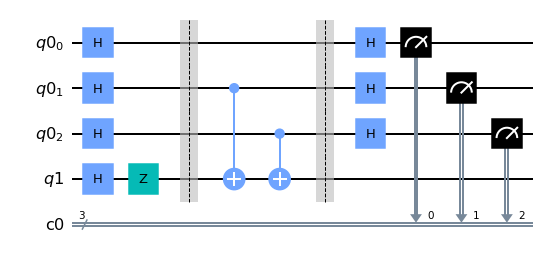

In [3]:
# s is the binary string to find as string type
s = "110"
n = len(s)
qc = circuitBV(s)
qc.draw('mpl')

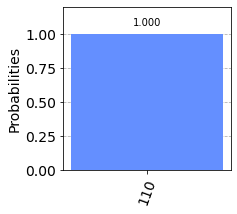

In [4]:
sim = Aer.get_backend('qasm_simulator')
res = execute(qc,backend=sim,shots=1024).result()
counts = res.get_counts()
plot_histogram(counts,figsize=sz)

In [5]:
provider.backends()
backend = least_busy(provider.backends(filters=lambda x:
                                   x.configuration().n_qubits > n and x.name() != 'ibmq_bogota' and
                                   not x.configuration().simulator and x.status().operational==True))
print("least busy backend: ", backend)

least busy backend:  ibmq_lima


In [6]:
from qiskit.tools.monitor import job_monitor
job = execute(qc,backend=backend,shots=1024)

job_monitor(job)

Job Status: job has successfully run


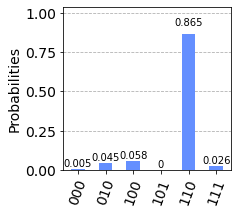

In [7]:
results = job.result()
answer = results.get_counts()

plot_histogram(answer,figsize=sz)